This script runs one param_set. Outputs results{}.csv and trialxtrial{}.csv

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
from sklearn import metrics
import pandas as pd

from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from scipy.special import logsumexp
from scipy.stats import norm
from glob import glob

In [2]:
from CSWSEM import generate_exp, seed_exp
from vanilla_lstm import VanillaLSTM
from sem.event_models import NonLinearEvent

TensorFlow Version: 2.3.1


### gridsearch params 

In [3]:
# parameter search over lr, n_epochs, alpha, lambda
model_type        = str('SEM')
lr                = float(0.005)
n_epochs          = int(16)    
log_alpha         = float(0.0)  # sCRP alpha is set in log scale
log_lambda        = float(0.0)  # sCRP lambda is set in log scale

In [4]:
seed = int(99)
condition = 'single'
n_train = 40
n_test = 10

### SEM configuration

In [5]:
optimizer_kwargs = dict(
    lr=lr, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-5, 
    amsgrad=False
) 

f_opts=dict(
  batch_size=25, 
  batch_update=False, 
  dropout=0.0,
  l2_regularization=0.0, 
  n_epochs=n_epochs,
  optimizer_kwargs=optimizer_kwargs
)

sem_kwargs = dict(
  lmda=np.exp(log_lambda), 
  alfa=np.exp(log_alpha), 
  f_opts=f_opts, 
  f_class=VanillaLSTM
)


# Run model

main fun call

In [6]:
""" 
main fun call
"""

results, trialXtrial, _ = seed_exp( 
              sem_kwargs, model_type=model_type, 
              n_train=n_train, n_test=n_test,
              condition=condition,seed=seed,
)

seed 99 condition single


In [7]:
# convert from JSON file format (dict) to pandas df
results = pd.DataFrame(results)
trialXtrial = pd.DataFrame(trialXtrial)

# plot

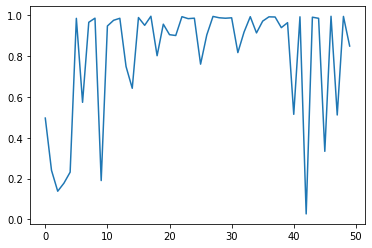

In [8]:
plt.plot(trialXtrial.accuracy)

# save
